In [218]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [219]:
df = pd.read_csv("test-data.csv")

In [220]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [221]:
df_copy = df

In [222]:
df_copy.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [223]:
df_copy["Location"].isna().sum()

4737

In [224]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [225]:
df_copy["Location"].mode()

0    United States of America
Name: Location, dtype: object

In [226]:
df_copy.dropna(subset=['Review'], inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6393 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6393 non-null   object
 2   Location  1705 non-null   object
dtypes: object(3)
memory usage: 199.8+ KB


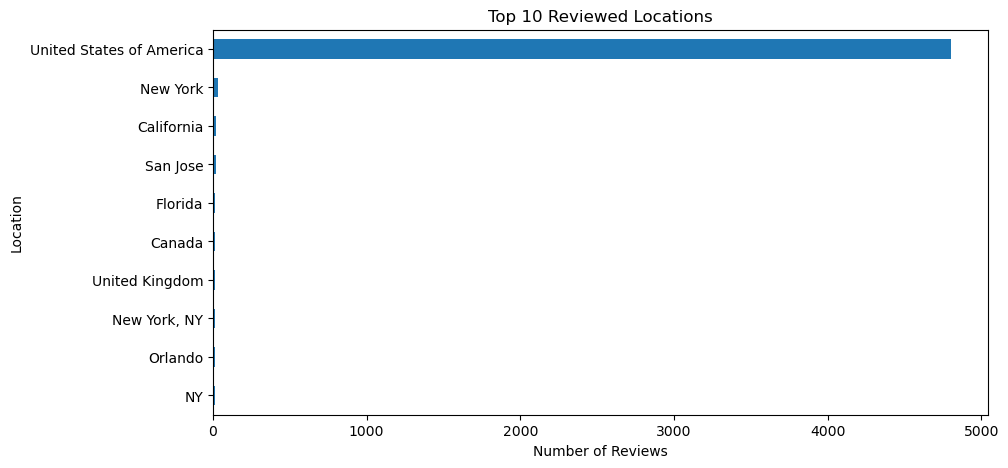

In [278]:
# Get the top N locations with the most reviews
top_n = 10  # You can adjust this number
top_locations = df_copy['Location'].value_counts().head(top_n)

# Create a horizontal bar chart
plt.figure(figsize=(10, 5))
top_locations.plot(kind='barh')
plt.title(f'Top {top_n} Reviewed Locations')
plt.xlabel('Number of Reviews')
plt.ylabel('Location')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest count at the top
plt.show()

In [279]:
top_locations

Location
United States of America    4804
New York                      34
California                    19
San Jose                      19
Florida                       16
Canada                        16
United Kingdom                14
New York, NY                  13
Orlando                       12
NY                            12
Name: count, dtype: int64

In [227]:
df_copy["Location"].fillna(df_copy["Location"].mode()[0], inplace=True)
df_copy.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,United States of America
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [228]:
df_copy.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,United States of America
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [229]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6393 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6393 non-null   object
 2   Location  6393 non-null   object
dtypes: object(3)
memory usage: 199.8+ KB


### Convert Date to appropriate format 

As we can see this gives us a value error (without format='mixed') implying that dates in this feature exist in two or more than two formats. 

In [260]:
df_copy['date'] = pd.to_datetime(df_copy['date'], format='mixed')

In [261]:
df_copy['Year'] = df_copy['date'].dt.year

In [263]:
review_counts_by_year = df_copy['Year'].value_counts().sort_index()
print("Review counts by year:\n", review_counts_by_year)

Review counts by year:
 Year
2018    2572
2019    3821
Name: count, dtype: int64


## Feature Engineering

Now that we've cleaned our data, we can start feature engineering. Firstly, it's best to create a satisfaction feature indicating positive or negative reviews

In [231]:
df_copy["Rating"] = ''
df_copy.head()

,Review,date,Location,Rating
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian,
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,
3,The hotel was adequate for my stay. The strips...,2019/08/20,United States of America,
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,


In [232]:
#!conda install --yes wordcloud

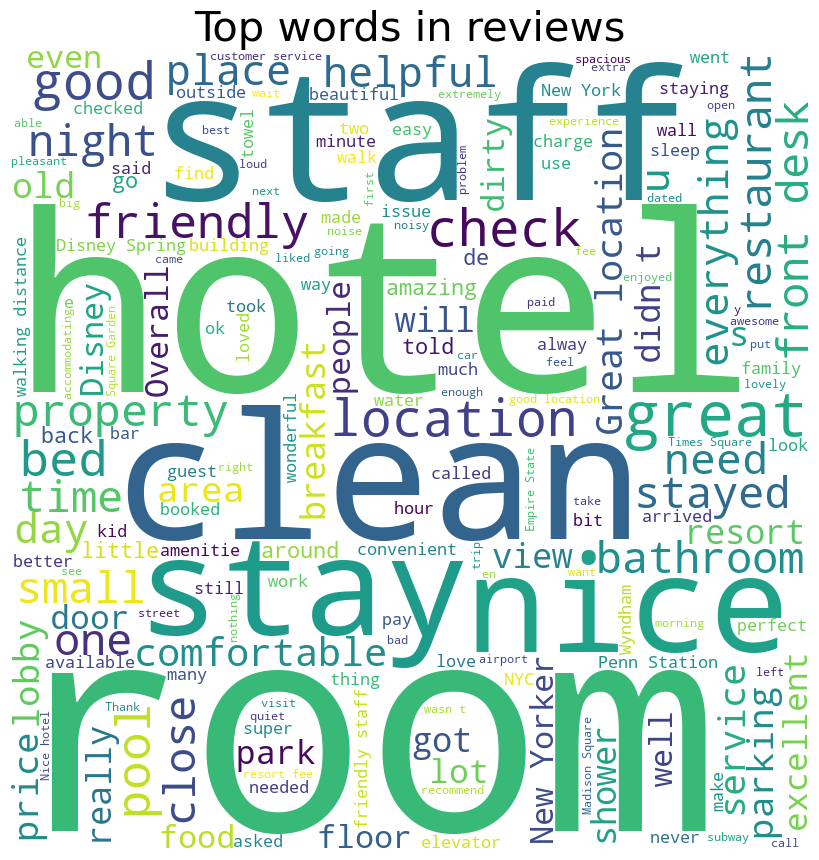

In [233]:
from wordcloud import WordCloud,STOPWORDS

def wordCloud_generator(df_copy, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(df_copy.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()

wordCloud_generator(df_copy['Review'], title="Top words in reviews")